## Simulation Analysis

This notebook will go over analyzing simulated data gathered from 2-Simulation-Generation

In [1]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from fooof import FOOOF, FOOOFGroup
from fooof.analysis import *
from fooof.utils import trim_spectrum
from fooof.synth import gen_group_power_spectra, param_sampler, gen_power_spectrum

from utils.ratios import *
from utils.analysis import *

This function finds the average value from all 100 trials we did for each calculation for each simulation.

In [2]:
# Loads simulated .npy data for each varied parameter simulated
slope_data = np.load("dat/slope30th test.npy")
cf_data = np.load("dat/cf30th test.npy")
amp_data = np.load("dat/amp30th test.npy")
bw_data = np.load("dat/bw30th test.npy")

# Averages all trials 
# [parameter][ratio_method][trials] -> [parameter][ratio_method]
slopes_avg = average_of_sims(slope_data)
cf_avg = average_of_sims(cf_data)
amp_avg = average_of_sims(amp_data)
bw_avg = average_of_sims(bw_data)


We now have a 2D array that we will place into a pandas DataFrame. A dataframe is a table or matrix data structure which has rows and columns and orgainizes data by labels. In the next cell we create a matrix where columns represent method of ratio calculation and rows are the different generated slopes.

In [3]:
df_slope = pd.DataFrame(slopes_avg,columns=["average_power","central_frequency", "power_density" ])
df_cf = pd.DataFrame(cf_avg,columns=["average_power","central_frequency", "power_density" ])
df_amp = pd.DataFrame(amp_avg,columns=["average_power","central_frequency", "power_density" ])
df_bw = pd.DataFrame(bw_avg,columns=["average_power","central_frequency", "power_density" ])

We will select each column as follows and use .values to get our column in numpy array format.

### slope analysis

In [4]:
slope_average_power = df_slope.average_power.values
slope_central_frequency = df_slope.central_frequency.values
slope_power_density = df_slope.power_density.values

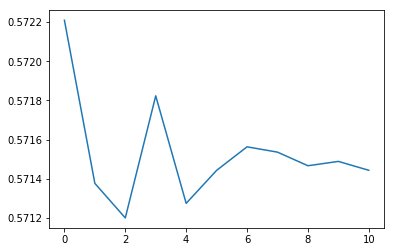

In [5]:
plt.plot(slope_average_power)

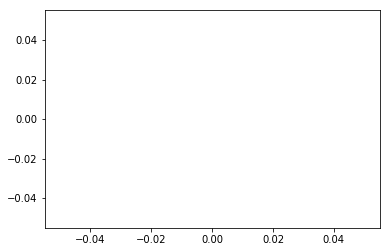

In [6]:
plt.plot(slope_central_frequency)

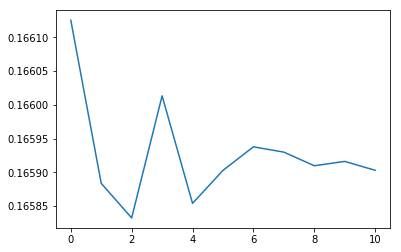

In [7]:
plt.plot(slope_power_density)

### Central Frequency Analysis

In [8]:
cf_average_power = df_cf.average_power.values
cf_central_frequency = df_cf.central_frequency.values
cf_power_density = df_cf.power_density.values

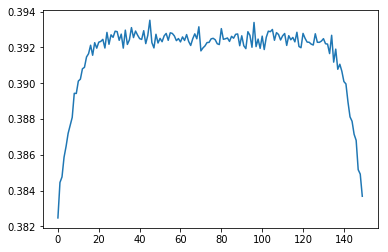

In [9]:
plt.plot(cf_average_power)

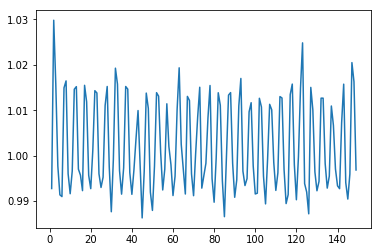

In [11]:
plt.plot(cf_central_frequency)

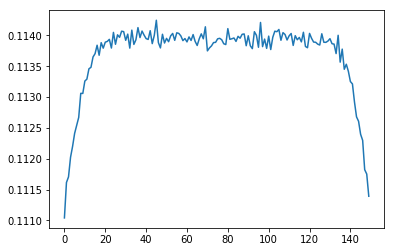

In [13]:
plt.plot(cf_power_density)

### Amplitude Analysis

In [14]:
amp_average_power = df_amp.average_power.values
amp_central_frequency = df_amp.central_frequency.values
amp_power_density = df_amp.power_density.values

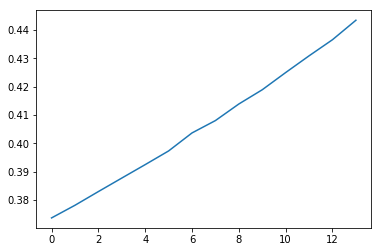

In [15]:
plt.plot(amp_average_power)

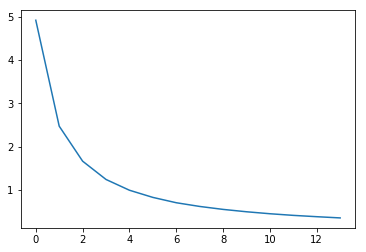

In [18]:
plt.plot(amp_central_frequency)

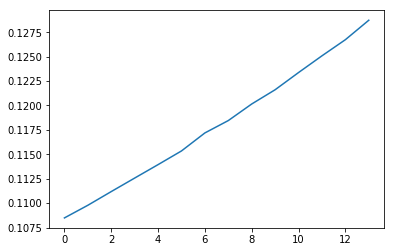

In [19]:
plt.plot(amp_power_density)

### Band Width Analysis

In [20]:
bw_average_power = df_bw.average_power.values
bw_central_frequency = df_bw.central_frequency.values
bw_power_density = df_bw.power_density.values

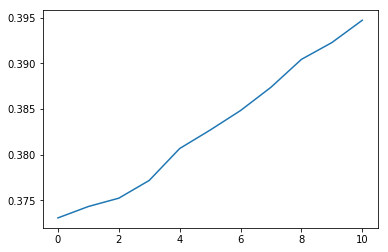

In [21]:
plt.plot(bw_average_power)

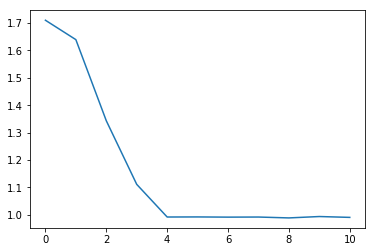

In [23]:
plt.plot(bw_central_frequency)

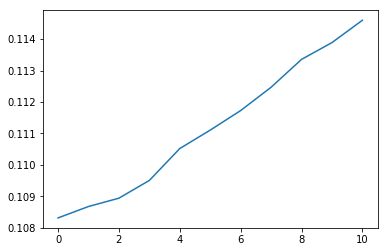

In [24]:
plt.plot(bw_power_density)